<div style="background-color: #006aff; padding: 10px; color: #18C0C4;">

# <font color='white' size='20'>**Overview**</font>

<font color='white'>
Zacharia Schmitz

Joshua Click

**Determine drivers of wine and build a model to be able to accuractely predict a wine's rating based on the finding we model.**

<div style="background-color: #006aff; padding: 10px; color: #18C0C4;">

# <font color='white' size='20'><i>**Plan**</i></font> → Acquire → Prepare → Explore → Model → Deliver

- **Notebook matched presentation (2 pts)**

Notebook was clean and relevant such that what was talked about what easy to see in the notebook, and what was in the notebook was relevant information that was included in the presentation.

- **Considered audience/setting (2 pts)**

You clearly considered the audience and setting in which the presentation was delivered. The language was professional, volume and speed of talk was appropriate, as was level of depth, and it was easy to follow you throughout the presentation

- **Conclusion with summary (2 pts)**

Your presentation concluded with a summary of what was found, recommendations, and next steps.

- **Under 5 minutes (2 pts)**

Adequate time for each section

---

`Volatile Acidity`:

- Definition: Volatile acidity refers to the presence of volatile acids, primarily acetic acid, in wine.

`Chlorides` (Chloride Content):

- Definition: Chlorides in wine refer to the concentration of chloride ions (Cl-) in the liquid.

`Density`:

- Definition: Density in wine refers to its mass per unit volume, typically measured in g/mL.

`Alcohol Content`:

- Definition: Alcohol content in wine is the percentage of alcohol by volume (ABV).

`Quality` **<i>(TARGET VARIABLE)</i>**:

- Definition: In this context, "quality" refers to a subjective rating or score assigned to a wine based on sensory evaluation and other factors.

### Check columns functions

<div style="background-color: #006aff; padding: 10px; color: #18C0C4;">

# Plan → <font color='white' size='20'><i>**Acquire**</i></font> → Prepare → Explore → Model → Deliver

Data is collected from two csv files (red and white) and combined into one (wine).

Original data is from: https://data.world/food/wine-quality

In [1]:
import wrangle as w
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = w.load_wine_data()

<div style="background-color: #006aff; padding: 10px; color: #18C0C4;">

# Plan → Acquire → <font color='white' size='20'><i>**Prepare**</i></font> → Explore → Model → Deliver

- **Functions used with md documentation. (2 pts)**

You called the functions from modules that you created to wrangle data in your report, and you included, in your final notebook, a markdown cell, explaining the steps you took to prepare the data and why.

- **Sound handling of missing values (2 pts)**

You handled missing values by imputing or removing them in a logical and communicated way. You correctly handled missing values using a sound logic that was communicated via markdown documentation. You correctly used either the training data or the entire dataset to impute (given your method(s) for filling missing values).

- **Scaling performed correctly (3 pts)**

You correctly scaled your data, and used scaled data in clustering and regression.

- **Three Samples Before Exploring (3 pts)**

Your data was split into three samples before exploring the interaction of variables, imputing, scaling, or running feature elimination/selection algorithms.

- **RandomState set (1 pt)**

Your split is reproducible because you set the random state to a seed.

- **Modules with functions using docstrings. (3 pts)**

Module(s) with functions for acquiring and preparing the data are created. Functions include useful docstrings (beyond the docstrings of functions written and shared by instructors)

---

In [2]:
# Assign DF for stat testing
df = df[["volatile_acidity", "chlorides", "density", "alcohol", "quality"]]

In [3]:
# Univariate exploration (before split)
w.check_columns(df, graphs=False, reports=False)

Total rows: 6497
Total columns: 5


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,volatile_acidity,float64,187,0,0.0,"[0.7, 0.88, 0.76, 0.28, 0.66, 0.6, 0.65, 0.58,...","[0.08, 1.58, 0.3396659996921656]"
1,chlorides,float64,214,0,0.0,"[0.076, 0.098, 0.092, 0.075, 0.069, 0.065, 0.0...","[0.009, 0.611, 0.05603386178236109]"
2,density,float64,998,0,0.0,"[0.9978, 0.9968, 0.997, 0.998, 0.9964, 0.9946,...","[0.98711, 1.03898, 0.9946966338309989]"
3,alcohol,float64,111,0,0.0,"[9.4, 9.8, 10.0, 9.5, 10.5, 9.2, 9.9, 9.1, 9.3...","[8.0, 14.9, 10.491800831149453]"
4,quality,int64,7,0,0.0,"[5, 6, 7, 4, 8, 3, 9]","[3.0, 9.0, 5.818377712790519]"


### Outliers

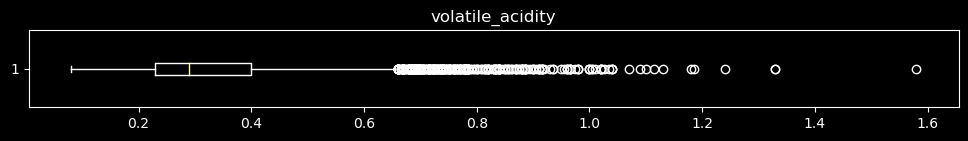

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 6120 (94.20%)
Number of results in upper quartile: 377 (5.80%)


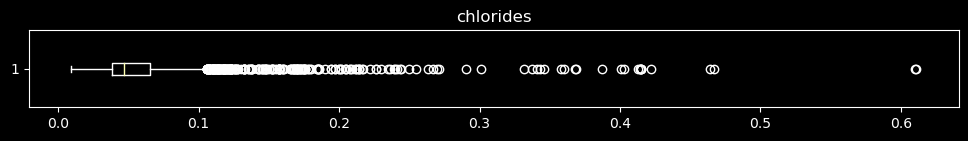

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 6211 (95.60%)
Number of results in upper quartile: 286 (4.40%)


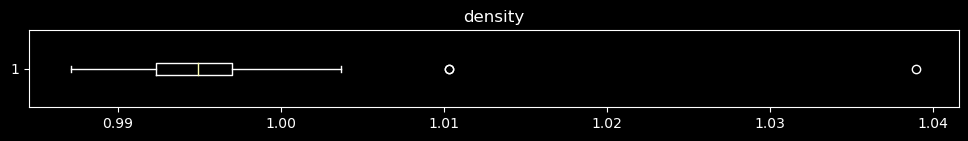

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 6494 (99.95%)
Number of results in upper quartile: 3 (0.05%)


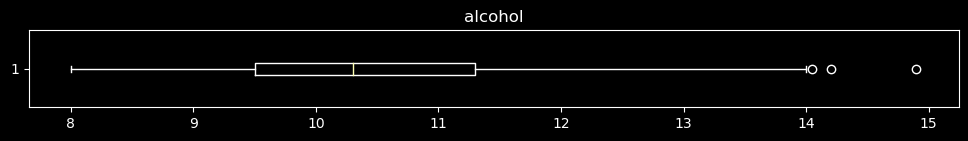

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 6494 (99.95%)
Number of results in upper quartile: 3 (0.05%)


In [4]:
w.box_plotter(df)

Due to some of these features having outliers, a standard or maybe robust scaler will most likely perform the best.

##### Split Data Function

In [5]:
# Split for multivariate exploration

train, validate, test = w.split_data(df, random_state=123)

train: 3897 (60% of 6497)
validate: 1300 (20% of 6497)
test: 1300 (20% of 6497)


<div style="background-color: #006aff; padding: 10px; color: #18C0C4;">

# Plan → Acquire → Prepare → <font color='white' size='20'><i>**Explore**</i></font> → Model → Deliver

- **Viz's/tests wrapped in a formed Q & A (6 pts)**

You called out at least four of the questions you asked of the data and provided a clear answer using natural language in markdown cells in your final report.

- **5-7 Vizs (5 pts)**

Between five and seven visualizations included. Included visualizations should be tied to specific statements/questions and takeaways/answers (with or without a statistical test) or set the context for the target or other key variable. Including more than seven visualizations in the final report typically indicates some are extraneous.

- **2 accurate tests included (5 pts)**

You correctly utilize at least two statistical tests (correct variables, conclusions drawn, no assumptions violated, and proper conclusions reached).

- **3 clustering models + explored (6 pts)**

You developed 3 clustering models and explored the relationship of those clusters to the target variable.

- **Analysis Summary + Features (6 pts)**

Summary of analysis includes key takeaways from the questions answered in explore, and documentation of the features that will be tried out in modeling and why, and which features will not move forward and why. Well done!

---

### Graphs

In [6]:
# Test normality and equal variance using Shapiro and Levene Tests

# If Shapiro's P value > 0.05, data is normal
# If Levene's P value > 0.05, data has equal variance

w.test_normality_and_variance(train, target="quality")

volatile_acidity: Not normal
volatile_acidity: Not equal variance

chlorides: Not normal
chlorides: Not equal variance

density: Not normal
density: Not equal variance

alcohol: Not normal
alcohol: Not equal variance



### Hypothesis and Stats

### 1. For `volatile_acidity` vs. `quality`:

$H_0$: The mean volatile_acidity for all levels of quality is the same.

$H_a$: The mean volatile_acidity for at least one level of quality is different.



### 2. For `chlorides` vs. `quality`:

$H_0$: The mean chlorides for all levels of quality is the same.

$H_a$: The mean chlorides for at least one level of quality is different.



### 3. For `density` vs. `quality`:

$H_0$: The mean density for all levels of quality is the same.

$H_a$: The mean density for at least one level of quality is different.



### 4. For `alcohol` vs. `quality`:

$H_0$: The mean alcohol content for all levels of quality is the same.

$H_a$: The mean alcohol content for at least one level of quality is different.

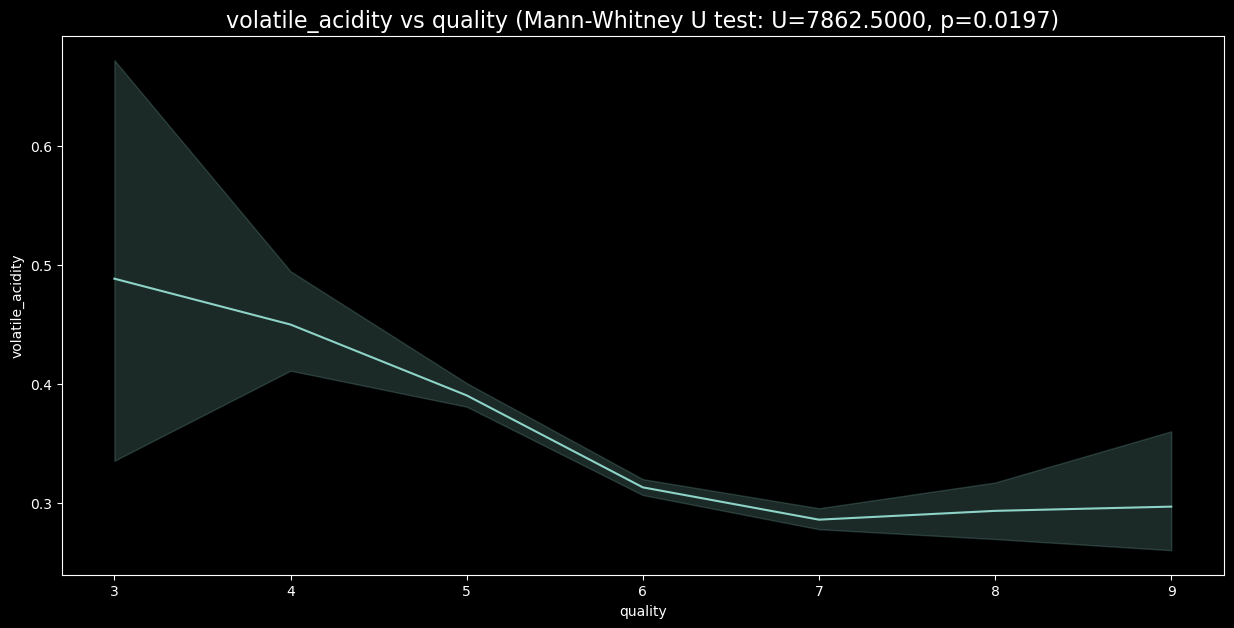

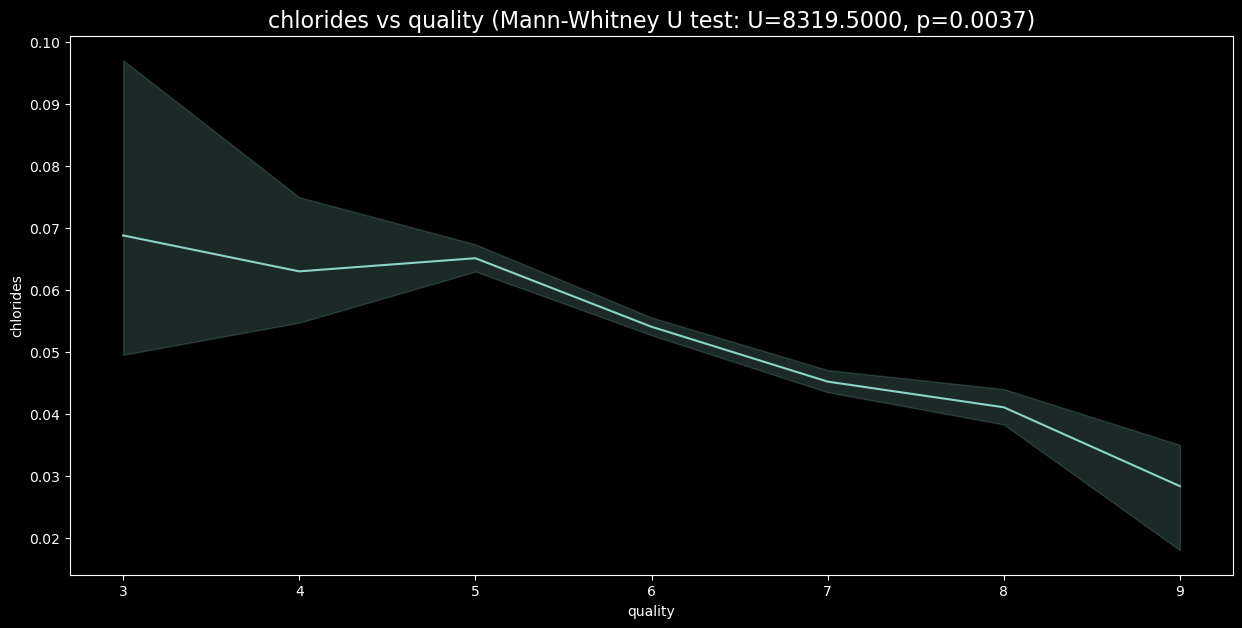

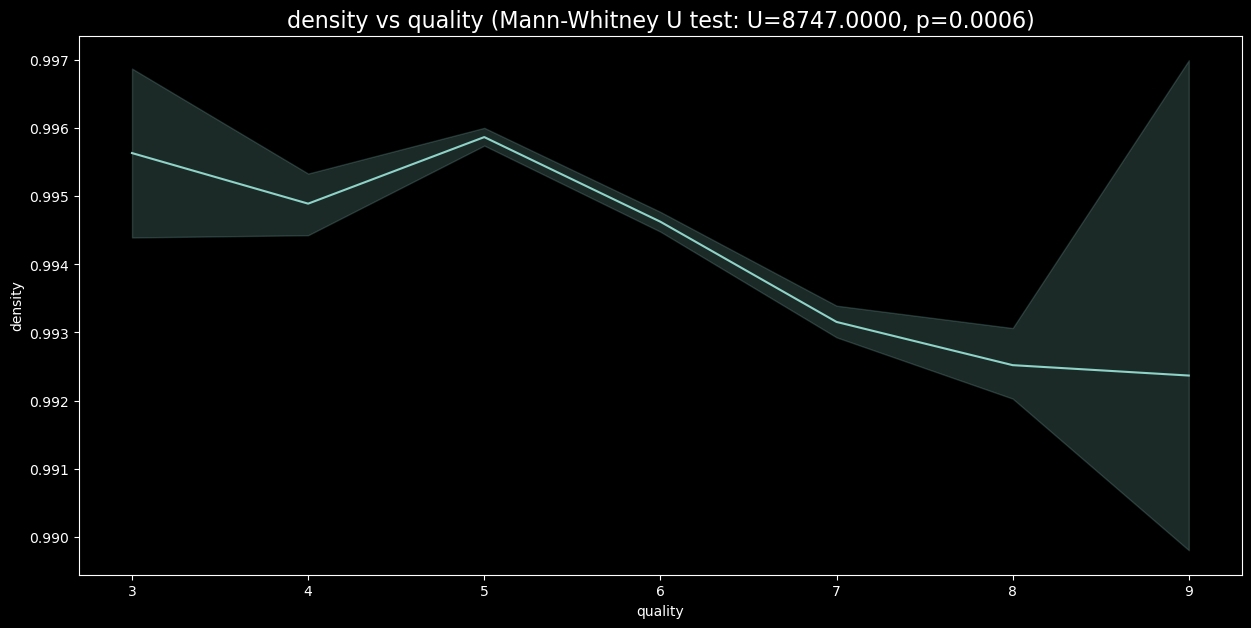

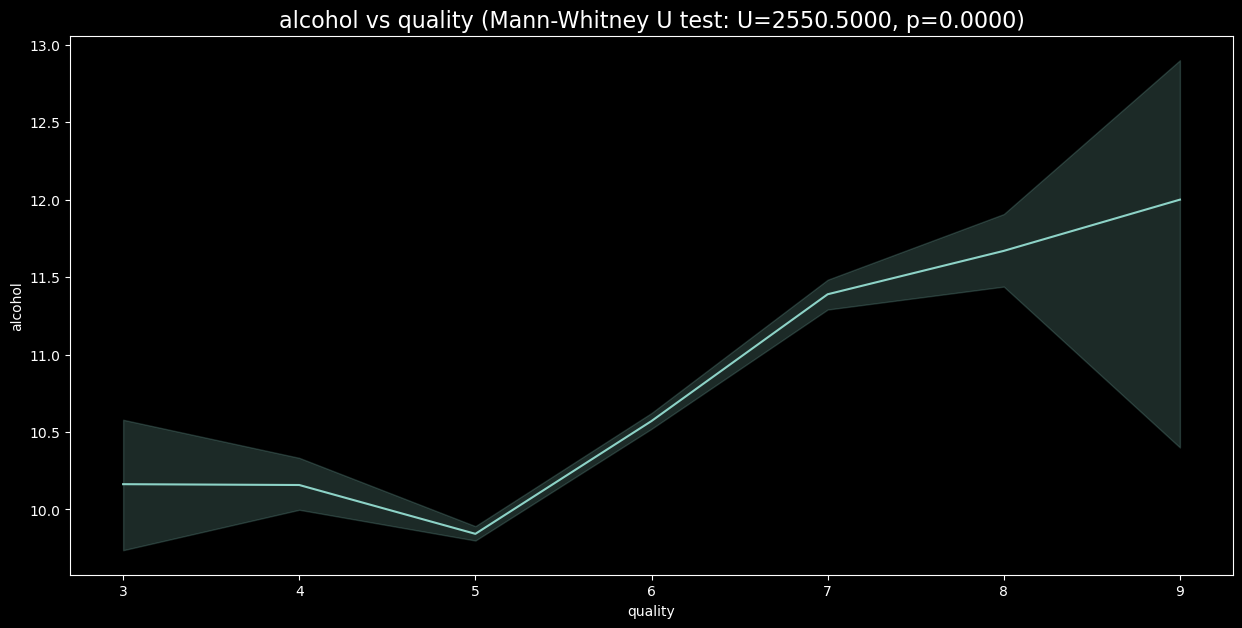

In [7]:
# Make a line plot for each column compared against quality, and stat test using Mann Whitney

w.plot_quality_vs_feature(train, "quality")

## Findings:

`volatile_acidity` vs. `quality`: 
- Acidity of the wine (volatile acidity) appears to be a significant factor influencing the quality rating.

`chlorides` vs. `quality`: 
- Chloride content in the wine is a significant factor in determining the quality rating.

`density` vs. `quality`: 
- Density is found to be a significant factor in assessing the quality of the wine. Wine snobs call this 'mouthfeel'.

`alcohol` vs. `quality`: 
- Alcohol content is a significant factor influencing the quality rating of the wine.

### Split and Scale before KMeans

#### Split

In [8]:
# We'll do exploration and train our model on the train data
X_train = train.drop(columns=["quality"])
y_train = train["quality"]

# We tune our model on validate, since it will be out-of-sample until we use it.
X_validate = validate.drop(columns=["quality"])
y_validate = validate["quality"]

# Keep the test separate, for our final out-of-sample dataset, to see how well our tuned model performs on new data.
X_test = test.drop(columns=["quality"])
y_test = test["quality"]

### Scale

In [11]:
# Scale X sets using MinMax

X_train_scaled, X_validate_scaled, X_test_scaled = w.mm_scale_data(X_train, X_validate, X_test)

### K Means Elbow for Feature Engineering

The silhouette score from SKLearn is a metric used to evaluate the quality of clustering. It measures how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, where a score of 1 indicates that the object is well-matched to its own cluster and poorly-matched to neighboring clusters, and a score of -1 indicates the opposite.

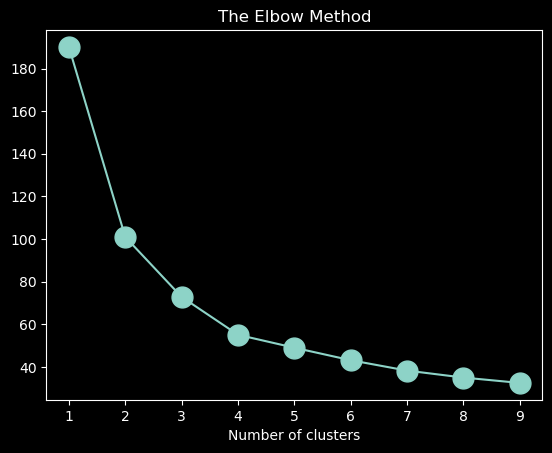

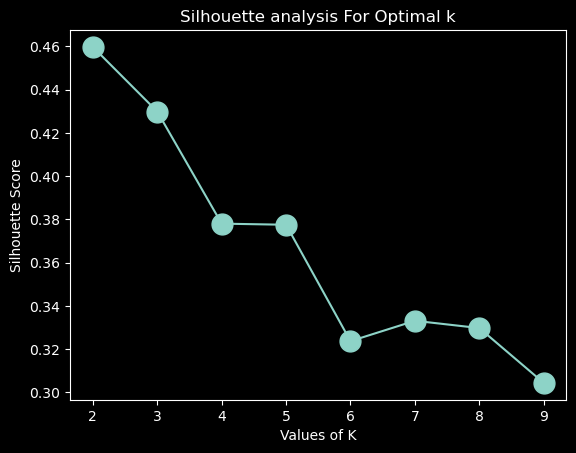

In [12]:
w.plot_elbow_and_silhouette(X_train_scaled)

<div style="background-color: #006aff; padding: 10px; color: #18C0C4;">

# Plan → Acquire → Prepare → Explore → <font color='white' size='20'><i>**Model**</i></font> → Deliver

- **Baseline predictions evaluated (2 pt)**

You made baseline predictions and evaluated the performance to measure your models against. Establishing a baseline prediction method that uses no features because it tells you if having a model has any value. If any model you build does not perform as well as a baseline that uses no features, then your features are not significant drivers of the outcome.

- **All models evaluated on train (2 pt)**

Models are always evaluated on train because it is a sample of data we have to see how the model performs. We should never skip straight to validate. We would be missing out on valuable observations.

- **Top models evaluated on validate (2 pt)**

Your top models are evaluated with the validate sample to check for overfitting.

**Eval metric(s) is clear and proper (2 pts)**

You identified what metric(s) you used to evaluate your models and why. If you considered multiple metrics, you explained how you selected a metric when one was better for model A and another is better for model B.

- **Final model evaluated on test (2 pts)**

Top model evaluated on test: we evaluate one last time on test in order to provide an estimate as to how we expect the model to perform in the future, in production, on data it has never seen.

- **Developed 4+ Unique Models (3 pts)**

You developed at least 4 unique models. Models can be different based on the features used, the hyperparameters selected, and/or the algorithm used to fit the data

---

### Model Loops

### Hyperparamter Tuning

- Take in a list of scalers to test
- Take in a number of clusters to test
- Cycles through the following hyperparameters:

```python
'n_estimators' = [100, 200, 300]
'max_depth' = [3, 6, 10]
'min_samples_split' = [2, 5, 10]
'min_samples_leaf' = [1, 2, 4]
```

**Returns a dataframe with the train and validate results of all the models**

In [54]:
rfc_scores_robust_3 = w.hyper_tuning(X_train, y_train, X_validate, y_validate, scaler_name='robust', n_clusters=3)
rfc_scores_mm_3 = w.hyper_tuning(X_train, y_train, X_validate, y_validate, scaler_name='minmax', n_clusters=3)
rfc_scores_standard_3 = w.hyper_tuning(X_train, y_train, X_validate, y_validate, scaler_name='standard', n_clusters=3)

rfc_scores_robust_4 = w.hyper_tuning(X_train, y_train, X_validate, y_validate, scaler_name='robust', n_clusters=4)
rfc_scores_mm_4 = w.hyper_tuning(X_train, y_train, X_validate, y_validate, scaler_name='minmax', n_clusters=4)
rfc_scores_standard_4 = w.hyper_tuning(X_train, y_train, X_validate, y_validate, scaler_name='standard', n_clusters=4)

rfc_scores_robust_5 = w.hyper_tuning(X_train, y_train, X_validate, y_validate, scaler_name='robust', n_clusters=5)
rfc_scores_mm_5 = w.hyper_tuning(X_train, y_train, X_validate, y_validate, scaler_name='minmax', n_clusters=5)
rfc_scores_standard_5 = w.hyper_tuning(X_train, y_train, X_validate, y_validate, scaler_name='standard', n_clusters=5)

In [57]:
# Concat all 3 dataframes
rfc_scores = pd.concat([rfc_scores_robust_3, rfc_scores_mm_3, rfc_scores_standard_3, rfc_scores_robust_4, rfc_scores_mm_4, rfc_scores_robust_5, rfc_scores_mm_5, rfc_scores_standard_5])

# Round acc_vall to 3 decimals
rfc_scores['acc_val'] = [round(float(x), 3) for x in rfc_scores['acc_val']]
rfc_scores['acc_train'] = [round(float(x), 3) for x in rfc_scores['acc_train']]
rfc_scores['acc_diff'] = [round(float(x), 3) for x in rfc_scores['acc_diff']]

# Make a new df with only accuracy differences less than 0.1
rfc_scores_01 = rfc_scores[rfc_scores['acc_diff'] <= 0.1]

# Sort by highest accuracy on validate
rfc_scores_01.sort_values('acc_val', ascending=False)

,acc_train,acc_val,acc_diff,scaler,clusters,prec_train,prec_val,recall_train,recall_val,f1_train,f1_val,supp_train,supp_val
Hyperparameters,,,,,,,,,,,,,
"(100, 6, 5, 1)",0.609,0.557,0.052,standard,3,0.606349,0.520461,0.60893,0.556923,0.575552,0.518512,3897,1300
"(100, 6, 2, 4)",0.603,0.555,0.048,standard,3,0.598198,0.514039,0.603285,0.555385,0.571914,0.518789,3897,1300
"(100, 6, 10, 2)",0.606,0.554,0.052,standard,3,0.595927,0.515149,0.605851,0.553846,0.574174,0.516928,3897,1300
"(100, 6, 2, 1)",0.606,0.554,0.052,minmax,3,0.644727,0.519985,0.606107,0.553846,0.572957,0.515026,3897,1300
"(300, 6, 10, 1)",0.604,0.553,0.051,minmax,3,0.610707,0.517284,0.603798,0.553077,0.571172,0.516477,3897,1300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(300, 3, 5, 2)",0.545,0.528,0.017,standard,3,0.523654,0.497024,0.545035,0.528462,0.49631,0.480585,3897,1300
"(300, 3, 10, 2)",0.543,0.528,0.015,standard,3,0.522664,0.500403,0.543495,0.528462,0.494388,0.479451,3897,1300
"(100, 3, 2, 2)",0.544,0.527,0.017,robust,4,0.518704,0.491458,0.544265,0.526923,0.496143,0.480696,3897,1300


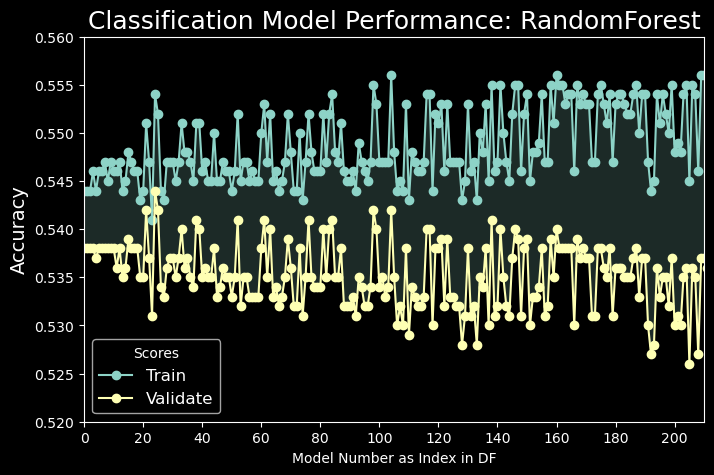

In [58]:
# Plot the model performance by accuracy score, and then the order it was modeled
w.plot_rfc_scores(rfc_scores_01)

As the ran through more hyperparamters, the train score went up, causing it to be overfit

### Test Model

![Alt text](image-1.png)

Best model was:

- Total of 3 clusters
- Scaled with `StandardScaler`

```python
    n_estimators=100,
    max_depth=6,
    min_samples_split=5,
    min_samples_leaf=1,
```

We then fit on train, and then predicted on test set

In [60]:
w.cluster_and_model_test(X_train, y_train, X_test, y_test, scaler="standard", n_clusters=3, model="rfc")

,acc_train,acc_test,scaler,clusters,prec_train,prec_test,recall_train,recall_test,f1_train,f1_test,supp_train,supp_test,acc_validate
Model,,,,,,,,,,,,,
"RandomForestClassifier(max_depth=6, min_samples_split=5)",0.607647,0.56,standard,3,0.60409,0.52657,0.607647,0.56,0.575265,0.51773,3897,1300,NaN
Baseline,0.33282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.33282


<div style="background-color: #006aff; padding: 10px; color: #18C0C4;">

# Plan → Acquire → Prepare → Explore → Model → <font color='white' size='20'><i>**Deliver**</i></font>

- **Adequate comments (6 pts)**

Your code contains code comments that are helpful to the reader in understanding what your blocks/lines of code are doing.

- **Adequate md documentation (6 pts)**

Notebook contains adequate markdown that documents your thought process, navigating through the pipeline. This helps your reader not get lost in the details.

- **Includes summary (2 pts)**

Your conclusion summary addresses the questions you raised in the opening of the project, which we would want to see at the end of every report notebook. Ideally, when the deliverable is a report such as this, the summary should tie together your analysis, the drivers of the outcome, and how you would expect your ML model to perform in the future on unseen data, in layman's terms.

- **Includes recommendations (2 pts)**

In addition to your summary, you included actionable recommendations based on your insights and analysis to your simulated audience, or someone who would find this information valuable. Your recommendations were not about what to do differently with the data, but instead are based on the business or domain you are studying. Nice work.

- **Includes next steps (2 pts)**

Your conclusion includes next steps from a data science perspective that will assist in improving your research. Ideally, if you talk about trying more algorithms to improve performance, think about why you need to improve performance. And if the business calls for it, remember the best way to improve performance is to have better predictors/features. If you talk about gathering more data, being specific about what data you think will help you understand the problem better and why is the way to go!

- **No Errors (5 pts)**

Your final notebook runs without error.

---

### **Takeaways and Key Findings**

### **Model Takeaways:**

- RandomForest was the best at very surface level tuning
- It became overfit with more hyperparameters
- Even with only 4 features, it performed very well

<br>

- **We positively identified some drivers of `quality` to be:**

    - `volatile_acidity`
    - `chlorides`
    - `density`
    - `alcohol`

<br>

- **With only these features, we found that 3 clusters performed the best**

### **Recommendations**

- Continue to run feature engineering and potentially test other models with other hyperparameters

- Possibly create models for red wine and white wine separately for better accuracy

### **Next Steps**

- Given more time we could check what is causing white wines to be rated lower

- Also with more time, we could run more hyperparamter and feature tuning to potentially get the models over 56% accuracy